# A - Getting Started with pandas

In [1]:
from pandas import Series, DataFrame
import pandas as pd

import numpy as np

## 1 - Introduction to pandas Data Structures

### Series

In [2]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
print(obj.values)
print(obj.index)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


In [4]:
# Often it will be desirable to create a Series with an index identifying each data point
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [5]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [6]:
print(obj2['a'])
obj2['d'] = 6
obj2[['c', 'a', 'd']]

-5


c    3
a   -5
d    6
dtype: int64

In [7]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [8]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [9]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [10]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [11]:
print('b' in obj2)
print('e' in obj2)

True
False


In [12]:
# You can create a Series from a dict
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [13]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4
# 3 values found in sdata were placed in the appropriate locations, but since no value for 'California' was found, 
# it appears as NaN (not a number) which is considered in pandas to mark missing or NA values.

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [14]:
#  The isnull and notnull functions in pandas should be used to detect missing data
print(pd.isnull(obj4))
print("####################")
print(pd.notnull(obj4))

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
####################
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool


In [15]:
# Series also has these as instance methods:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [16]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [17]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [18]:
# A Series’s index can be altered in place by assignment
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

In [19]:
# There are numerous ways to construct a DataFrame, 
# though one of the most common is from a dict of equal-length lists or NumPy arrays
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [20]:
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [21]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [22]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [23]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [24]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [25]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [26]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [27]:
frame2['debt'] = np.arange(5.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


In [28]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [29]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [30]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [31]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [32]:
# When data is passed in the form of dict of dicy
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [33]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


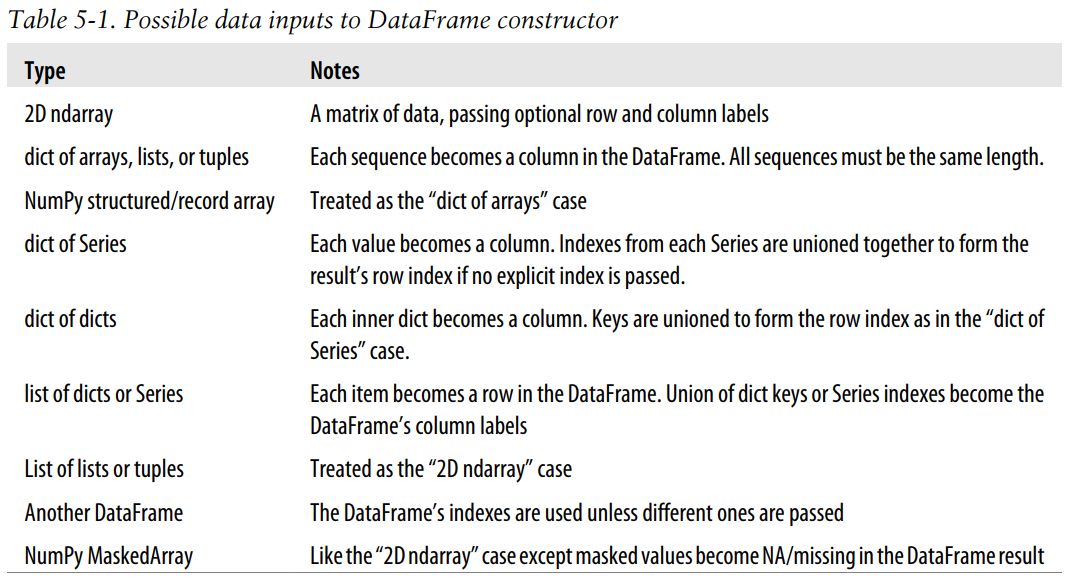

In [34]:
from IPython.display import Image
Image('PandasBasics/PossibleDataInputsToDataFrameConstructor.PNG')

### Index Objects

In [35]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [36]:
# !! Index objects are immutable and thus can’t be modified by the user: !!
index[1] = 'd'

TypeError: Index does not support mutable operations

In [37]:
index = pd.Index(np.arange(3))
obj2 = Series([1.5, -2.5, 0], index=index)
obj2.index is index

True

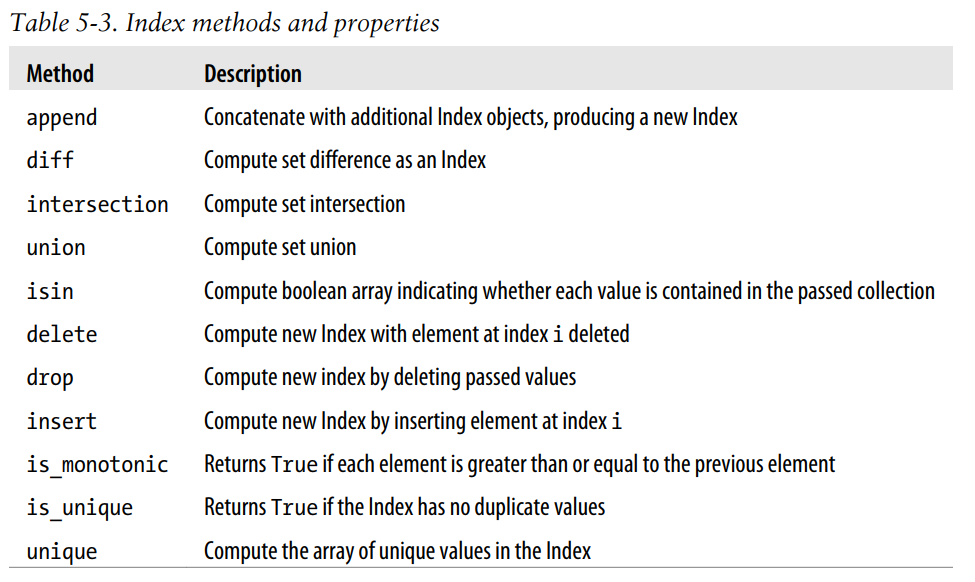

In [38]:
Image('PandasBasics/IndexMethodsAndProperties.PNG')

## 2 - Essential Functionality

### Reindexing